<!-- dom:TITLE: Équations différentielles ordinaires -->
# Équations différentielles ordinaires
<!-- dom:AUTHOR: Ahmed Ammar Email:ahmed.ammar@fst.utm.tn at Institut Préparatoire aux Études Scientifiques et Techniques, Université de Carthage. -->
<!-- Author: -->  
**Ahmed Ammar** (email: `ahmed.ammar@fst.utm.tn`), Institut Préparatoire aux Études Scientifiques et Techniques, Université de Carthage.

Date: **Mar 3, 2021**

Copyright 2021, Ahmed Ammar. Released under CC Attribution 4.0 license

In [1]:
%config InlineBackend.figure_format = 'svg'

# La méthode de Runge-Kutta d'ordre 4
Les méthodes de Runge-Kutta (ou RK), l'ordre 2 ou 4, sont très couramment utilisées pour la résolution d'équations différentielles ordinaires (EDO). Ce sont des méthodes à pas unique, directement dérivées de la méthode d'Euler, qui est une méthode RK1.

Elles ont l'avantage d'être simples à programmer et assez stables pour les fonctions courantes de la physique. Sur le plan de l'analyse numérique, elles ont surtout l'immense avantage de ne pas nécessiter autre chose que la connaissance des valeurs initiales.

## Algorithme de Runge-Kutta d'ordre 4
On part de la formule d'Euler sous sa forme scalaire, qui donne : $y_{n+1} = y_n + h*f(x_n, y_n), et x_{n+1} = x_n + h$.

La méthode RK du deuxième ordre produit deux coefficients $k_1$ et $k_2$, qui permettent d'écrire :

\begin{align*}
k_1 &= h*f(x_n, y_n) \\
k_2 &= h*f(x_n + h/2, y_n + k_1/2 ) \\
y_{n+1} &= y_n + k_2 + O(h^3)
\end{align*}

Cette méthode exige donc deux évaluations de $f$. L'erreur de consistance est en $O(h^3)$ et l'erreur globale de convergence est d'ordre $O(h^2)$. Pour obtenir plus de précision, mais en doublant le temps de calcul puisqu'on procède à 4 évaluations de $f$, voici la méthode RK4 :

\begin{align*}
k_1 &= h*f(x_n, y_n) \\
k_2 &= h*f(x_n + h/2, y_n + k_1/2 ) \\
k_3 &= h*f(x_n + h/2, y_n + k_2/2 ) \\
k4 &= h*f(x_n + h, y_n + k_3)\\
y_{n+1} &= y_n + k_1/6 + k_2/3 + k_3/3 + k_4/6 + O(h^5)
\end{align*}

# Système dynamique différentiel de Lorenz (attracteur de Lorenz)

L'attracteur de Lorenz, connu aussi sous le nom de **papillon de Lorenz**, est sans doute le plus connu des systèmes dynamiques non linéaires, essentiellement pour son aspect esthétique!

Le problème avec la prédiction météorologique est l'interdépendance de tous les paramètres de l'atmosphère. Pour prendre un exemple, lorsque vous avez une zone de dépression, il y a un déplacement d'une masse d'air voisine. C'est ici une réaction thermodynamique, l'atmosphère s'organise pour que son enthalpie soit minimum alors qu'en même temps, le sol continue à chauffer l'air créant de nouveau un déséquilibre. De même, l'ensoleillement n'étant pas constant à la surface de la Terre (dépendant de la situation géographique et des saisons), nous avons donc formation de diverses cellules de convections qui se retrouvent interdépendantes. Une perturbation sur l'une de ces cellules peut être retrouvée sous la forme d'une autre perturbation sur une autre cellule de convection. C'est ici l'idée qui s'est dégagée de la remarque de Lorenz: *"Le battement d'ailes d'un papillon au Brésil peut-il provoquer une tornade au Texas?"*

![](imgs/convection.jpg)

<!-- end figure -->

Lorsque Lorenz a découvert cette théorie en 1963, il étudiait la météorologie au MIT. Comme nous l'avons dit, il fut l'un des premiers a avoir pu utiliser un ordinateur! Bien sûr, ce n'était pas du tout les mêmes machines que nous utilisons aujourd'hui! Ces derniers occupaient une salle entière, chauffaient comme un diable et avaient une capacité de calcul inférieure aux premiers smartphones commercialisés. Il fallait donc être très patient lorsque vous vouliez faire une modélisation et chaque erreur faisait perdre du temps à vos collègues (car à cette époque, il n'y avait que quelques ordinateurs au MIT) et gaspillait énormément d'énergie.

Le système différentiel résulte d'une simplification assez drastique de l'ensemble des équations différentielles en jeu. C'est un système paramétrique dont voici l'expression :

\begin{align*}
\dfrac{dx}{dt} &=\sigma\left[ y(t)-x(t) \right]\\
\dfrac{dy}{dt} &=\rho \ x(t) - y(t) - x(t) \ z(t)\\
\dfrac{dz}{dt} &=x(t) \ y(t) - \beta \ z(t)
\end{align*}

$\sigma$, $\beta$ et $\rho$ sont trois paramètres strictement positifs, fixés.
* $\sigma$ dépend des propriétés du fluide (c'est la constante de Prandtl , qui caractérise la viscosité et la conductivité thermique du fluide),

* $\beta$ varie avec la géométrie de la cellule de convection,

* $\rho$ varie en fonction du gradient de température dans la cellule.

Les variables dynamiques x, y et z représentent l'état du système à chaque instant:
* x caractérise le taux de convection,

* y et z le gradient de température, respectivement horizontal et vertical.

A vrai dire, la signification réelle des paramètres et des variables importe peu pour l'étude de la dynamique du système de Lorenz. Il faut simplement savoir que l'on fixe généralement $\sigma = 10$ et $\beta= 8/3$ (les paramètres physiques et géométriques) et que l'on étudie le comportement en fonction de la variation de $\rho$ et des conditions initiales.

Le tracé de la trajectoire dans l'espace de phase est obtenu avec le programme `AttracteurLorenzRK4.py`, qui est écrit selon la méthode RK4 et avec les valeurs de paramètres $\sigma = 10$, $\beta= 8/3$ et $\rho = 28$. Les conditions initiales pour [x0,y0,z0] sont [1,1,20].

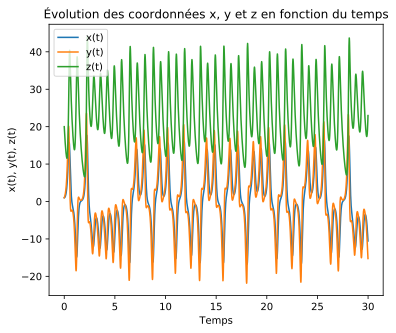

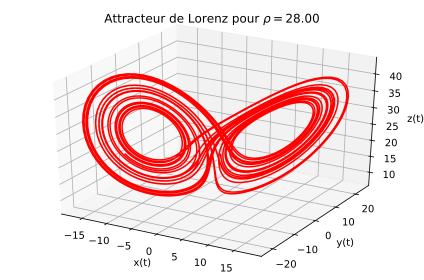

In [3]:
## NOM DU PROGRAMME: AttracteurLorenzRK4.py
#% IMPORTATION
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#Initial values
sigma = 10
beta = 8.0/3.0
rho = 28.0
#Compute the time-derivative of a Lorenz system.
def xt(x, y, z, t):
    return (sigma*(y - x))
def yt(x, y, z, t):
    return (rho*x - y - x*z)
def zt(x, y, z, t):
    return (-1*(beta*z) + x*y)
# définition de la fonction RK4
def RungeKutta4(xt,yt,zt,n = 3500, tf = 30):
    x = np.zeros(n)
    y = np.zeros(n)
    z = np.zeros(n)
    t = np.zeros(n)
    x[0],y[0], z[0], t[0] = 1.0, 1.0, 20, 0
    dt = tf/float(n)
    # calculer la solution approximative RK4.
    for k in range (n-1):
        t[k+1] = t[k] + dt
        k1 = xt(x[k], y[k], z[k], t[k])
        l1 = yt(x[k], y[k], z[k], t[k])
        m1 = zt(x[k], y[k], z[k], t[k])
        
        k2 = xt((x[k] + 0.5*k1*dt), (y[k] + 0.5*l1*dt), \
                (z[k] + 0.5*m1*dt), (t[k] + dt/2))
        l2 = yt((x[k] + 0.5*k1*dt), (y[k] + 0.5*l1*dt), \
                (z[k] + 0.5*m1*dt), (t[k] + dt/2))
        m2 = zt((x[k] + 0.5*k1*dt), (y[k] + 0.5*l1*dt), \
                (z[k] + 0.5*m1*dt), (t[k] + dt/2))

        k3 = xt((x[k] + 0.5*k2*dt), (y[k] + 0.5*l2*dt), \
                (z[k] + 0.5*m2*dt), (t[k] + dt/2))
        l3 = yt((x[k] + 0.5*k2*dt), (y[k] + 0.5*l2*dt), \
                (z[k] + 0.5*m2*dt), (t[k] + dt/2))
        m3 = zt((x[k] + 0.5*k2*dt), (y[k] + 0.5*l2*dt), \
                (z[k] + 0.5*m2*dt), (t[k] + dt/2))

        k4 = xt((x[k] + k3*dt), (y[k] + l3*dt), (z[k] + m3*dt), (t[k] + dt))
        l4 = yt((x[k] + k3*dt), (y[k] + l3*dt), (z[k] + m3*dt), (t[k] + dt))
        m4 = zt((x[k] + k3*dt), (y[k] + l3*dt), (z[k] + m3*dt), (t[k] + dt))

        x[k+1] = x[k] + (dt*(k1 + 2*k2 + 2*k3 + k4) / 6)
        y[k+1] = y[k] + (dt*(l1 + 2*l2 + 2*l3 + l4) / 6)
        z[k+1] = z[k] + (dt*(m1 + 2*m2 + 2*m3 + m4) / 6)
    return x, y, z, t

x, y, z, t = RungeKutta4(xt,yt,zt)

plt.figure (figsize = (6,5))
plt.plot (t, x) 
plt.plot (t, y)
plt.plot (t, z)
plt.xlabel ( 'Temps' )
plt.ylabel ( 'x(t), y(t), z(t)' )
plt.title ('Évolution des coordonnées x, y et z en fonction du temps' )
plt.legend(['x(t)','y(t)','z(t)'], loc = 2)
plt.show ( )
# FIGURE 3d: ATTRACTEUR DE LORENZ
fig = plt.figure()
ax = plt.axes(projection = '3d' )
ax.plot ( x, y, z, color = 'r' )
ax.set_xlabel ('x(t)')
ax.set_ylabel ('y(t)')
ax.set_zlabel ('z(t)')
ax.set_title ('Attracteur de Lorenz pour ' + r"$\rho = %.2f$"%rho)
plt.tight_layout()
plt.show()

Lorsque nous modélisons ce système dans l'espace des phases, nous avons apparition d'une structure fractale que nous appelons "Attracteur de Lorenz". C'est cette construction mathématique qui a probablement donné l'idée du papillon à Lorenz pour illustrer sa mécanique Chaotique lors de sa conférence de 1963!

Nous remarquons que notre système va devenir chaotique lorsque $\rho$ va dépasser une valeur critique $\rho_c = 19.44$

<!-- dom:FIGURE:[scripts/lorenz_ode_r.png, width=500 frac=0.7] Formation d'un deuxième attracteur lorsque $\rho$ dépasse la valeur critique $\rho_c = 19.44$. -->
<!-- begin figure -->

**Formation d'un deuxième attracteur lorsque $\rho$ dépasse la valeur critique $\rho_c = 19.44$**

![](scripts/lorenz_ode_r.png)


Lorsque notre système n'est pas chaotique, nous avons la formation d'un seul attracteur, cependant, lorsque $\rho$ dépasse la valeur $\rho_c$, notre papillon déploie ses ailes pour nous inviter dans le monde du Chaos! Nous pouvons alors voir la présence d'un deuxième attracteur venant perturber la trajectoire de notre système qui rester à naviguer entre les deux puits de gravité de ces deux attracteurs. On qualifie également cette figure "d'attracteur étrange" car les trajectoires ne se coupent pas et semblent évoluer au hasard.